In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv('krkopt.data.csv').drop('index', axis=1)

In [27]:
df.head()

,a,1,b,3,c,2,draw
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw


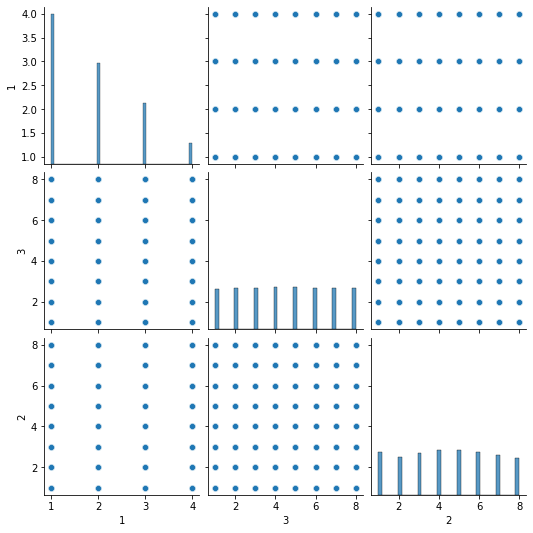

In [28]:
sns.pairplot(data=df)

In [29]:
df.head()

,a,1,b,3,c,2,draw
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw


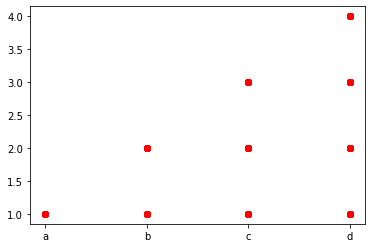

In [30]:
plt.plot(df['a'], df['1'], 'ro')

<AxesSubplot:>

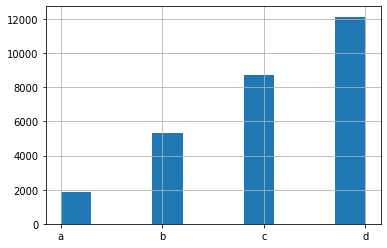

In [31]:
df['a'].hist()

<AxesSubplot:>

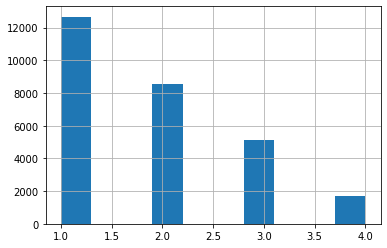

In [32]:
df['1'].hist()

<AxesSubplot:xlabel='1', ylabel='a'>

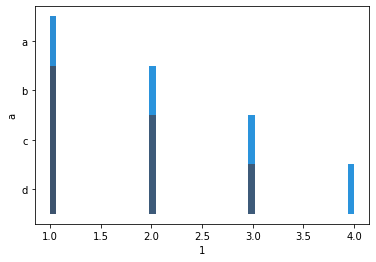

In [33]:
sns.histplot(data=df, x='1', y='a')

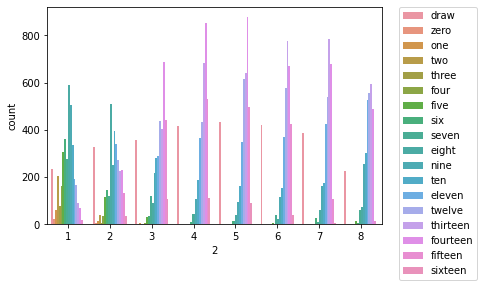

In [34]:
sns.countplot(x='2', data=df, hue='draw')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

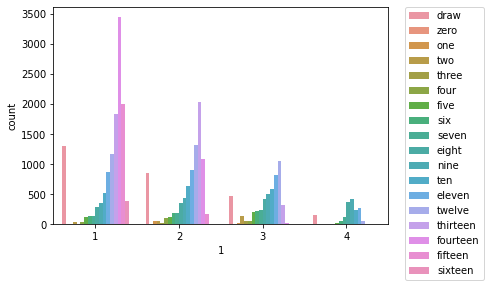

In [35]:
sns.countplot(x='1', data=df, hue='draw')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

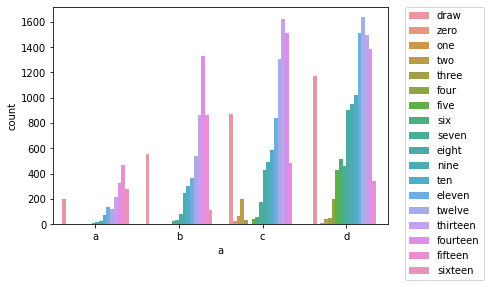

In [36]:
sns.countplot(x='a', data=df, hue='draw')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [37]:
df.head()

,a,1,b,3,c,2,draw
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw


In [38]:
def replace_draws(col):
    if col == 'draw':
        return 0
    else:
        return 1

In [39]:
df['won'] = df['draw'].apply(replace_draws)

In [40]:
wh_king_pos = pd.get_dummies(df['a']).rename(columns={'a':'wa','b':'wb','c':'wc','d':'wd'})
wh_king_pos.head()
rook_pos = pd.get_dummies(df['b']).rename(columns={'a':'Wa','b':'Wb','c':'Wc','d':'Wd'})
blk_king_pos = pd.get_dummies(df['c'])
df.drop(['a', 'b', 'c'], axis=1, inplace=True)
df = pd.concat([df, wh_king_pos, rook_pos, blk_king_pos], axis=1)

In [41]:
df.drop('draw', axis=1, inplace=True)

In [42]:
df.head()

,1,3,2,won,wa,wb,wc,wd,Wa,Wb,...,g,h,a,b,c,d,e,f,g,h
0,1,1,2,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,2,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2,3,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
from sklearn.model_selection import train_test_split
X = df.drop('won', axis=1)
y = df['won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(X_train, y_train)
X_train.columns

Index(['1', '3', '2', 'wa', 'wb', 'wc', 'wd', 'Wa', 'Wb', 'Wc', 'Wd', 'e', 'f',
       'g', 'h', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
      dtype='object')

In [47]:
predictions = knn.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 528  301]
 [ 234 7354]]


              precision    recall  f1-score   support

           0       0.69      0.64      0.66       829
           1       0.96      0.97      0.96      7588

    accuracy                           0.94      8417
   macro avg       0.83      0.80      0.81      8417
weighted avg       0.93      0.94      0.94      8417



In [50]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))


KeyboardInterrupt: 

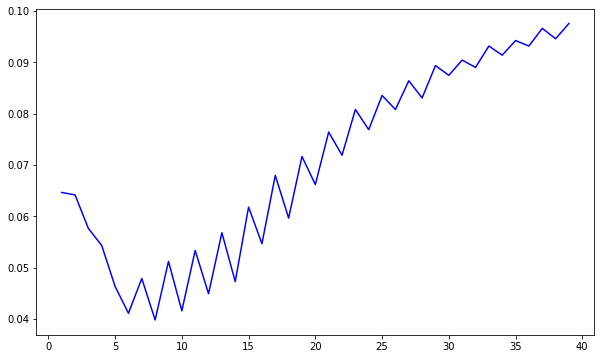

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue')

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=8)

In [ ]:
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
final_predictions = knn_final.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, final_predictions))
print('\n')
print(classification_report(y_test, final_predictions))

[[ 567  296]
 [  39 7515]]


              precision    recall  f1-score   support

           0       0.94      0.66      0.77       863
           1       0.96      0.99      0.98      7554

    accuracy                           0.96      8417
   macro avg       0.95      0.83      0.88      8417
weighted avg       0.96      0.96      0.96      8417



In [ ]:
['1'] + ['2']

['1', '2']